# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from scipy.stats import linregress as linR
from scipy.optimize import curve_fit as c_f

# Подсчёт соседей в 3D и Triangle

### Длины 100-1200

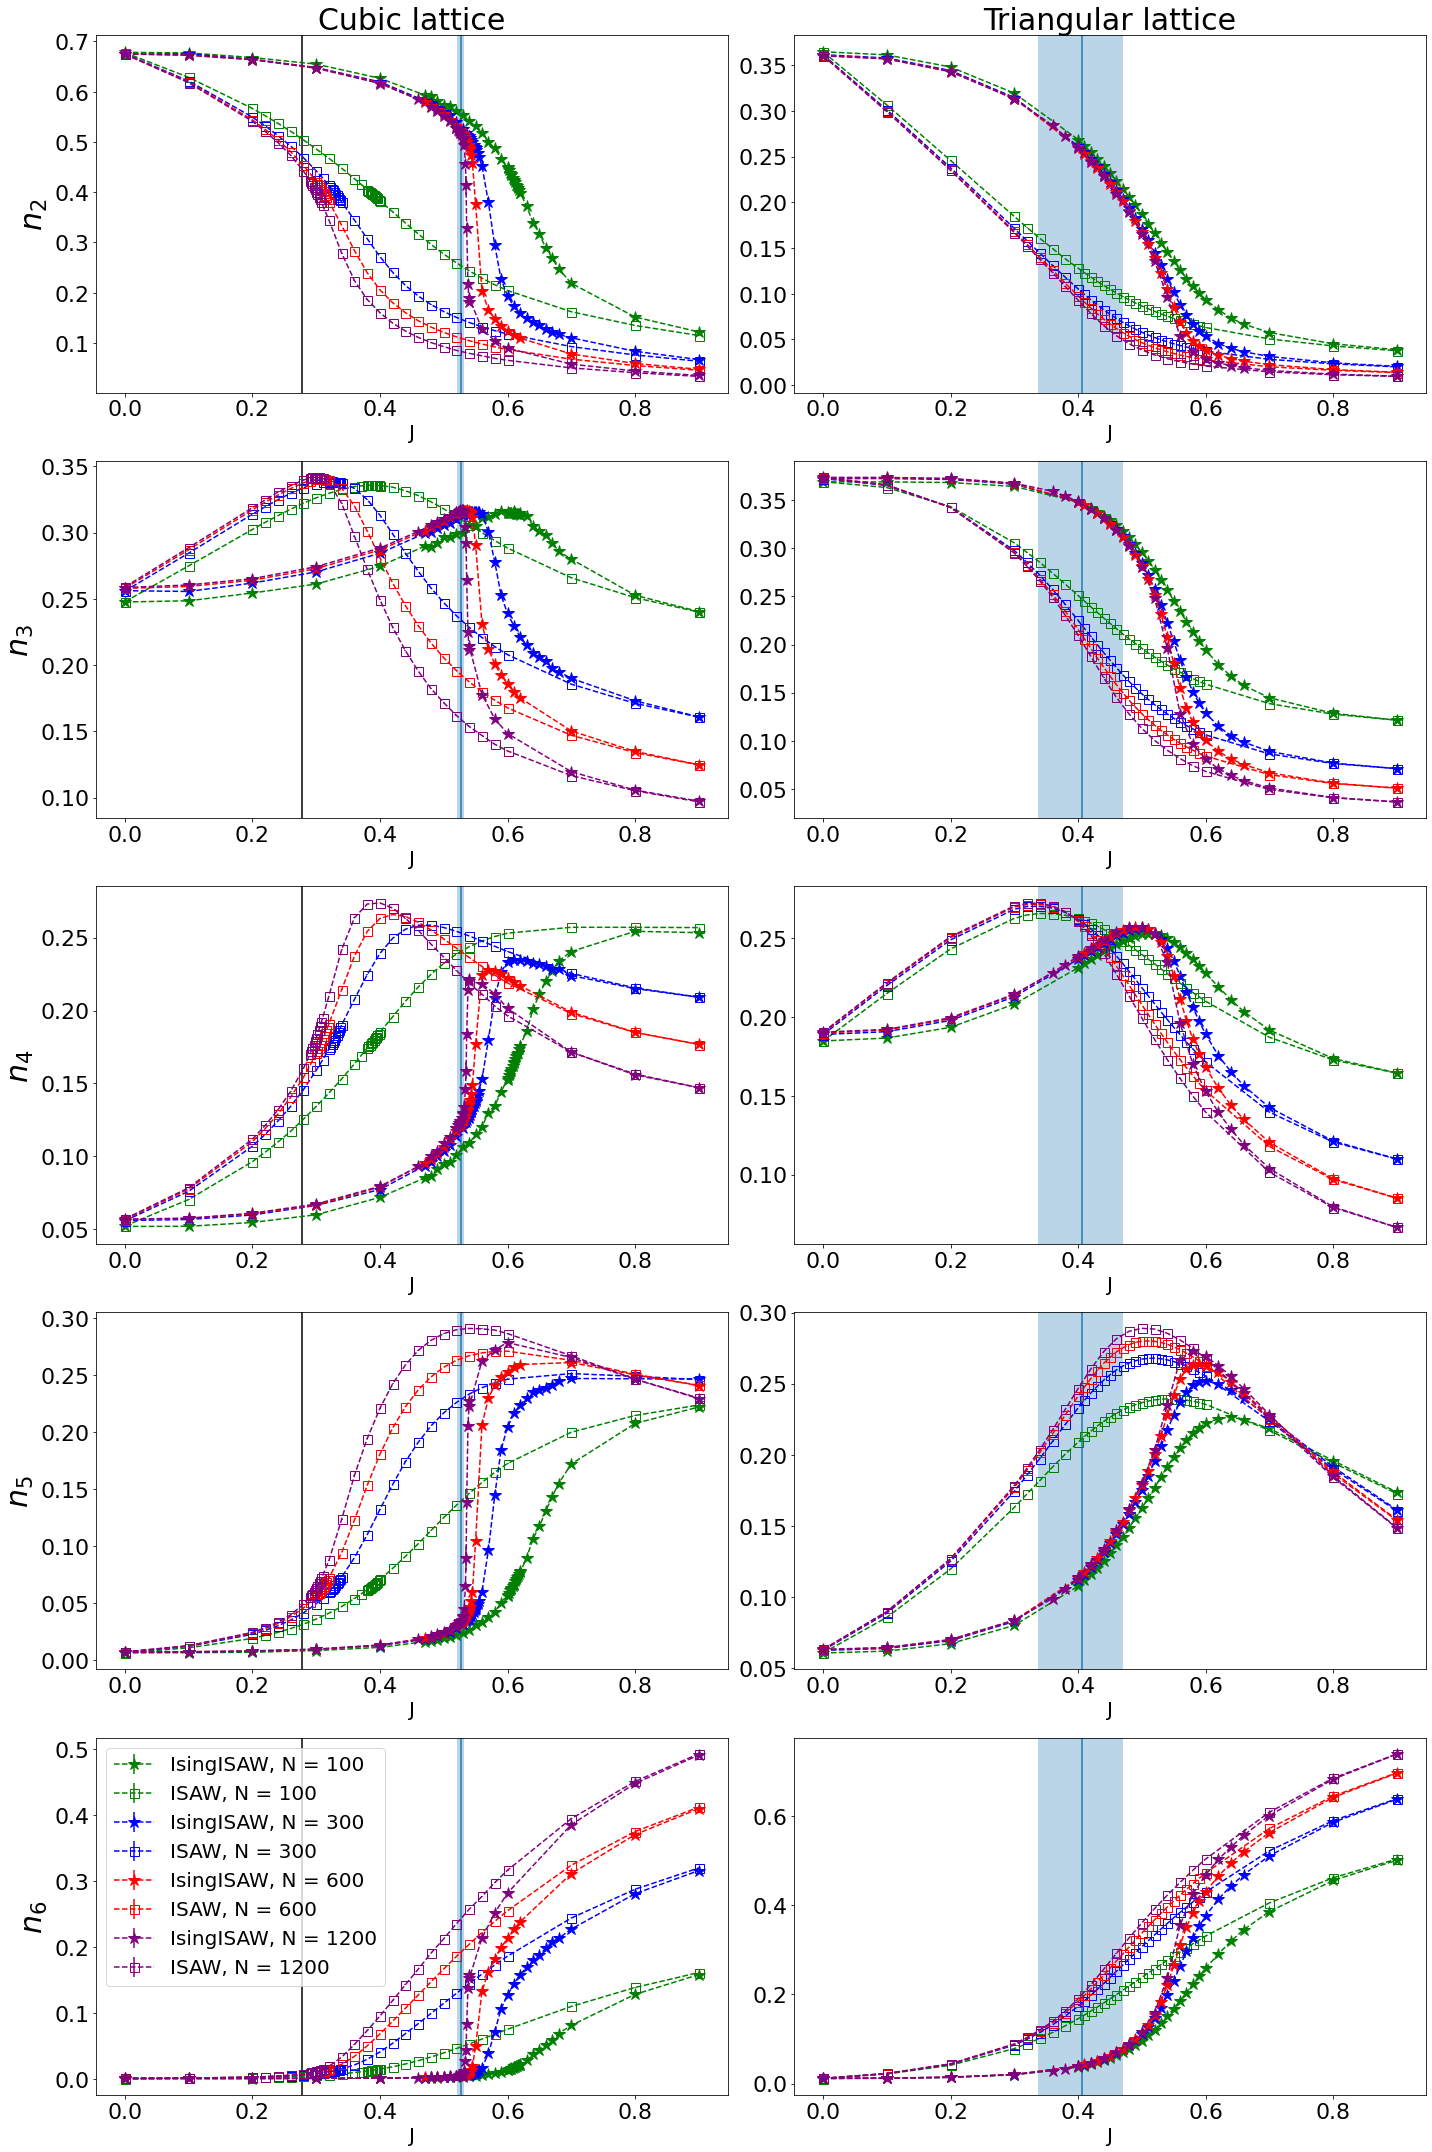

In [17]:
DIR = Path.cwd().parent / "Simulation Results"
dirs = ["Geo_ISAW_3D_All.txt", "Geo_Is_3D_All.txt", "Geo_TrISAW_All.txt", "Geo_TrIs_All.txt"]
data_Is_3D = np.loadtxt(DIR / dirs[1])
data_ISAW_3D = np.loadtxt(DIR / dirs[0])
data_TrIs = np.loadtxt(DIR / dirs[3])
data_TrISAW = np.loadtxt(DIR / dirs[2])

fig, ax = plt.subplots(5, 2, figsize=(20,30))

Ns = np.unique(data_Is_3D[:,0])
k = 0
col = ['green', 'blue', 'red', 'purple']

crit_ISAW3D = 0.2779
crit_TrISAW = [0.337, 0.406, 0.470]
crit_Is3D = [1 / 1.88, 1 / 1.90, 1 / 1.92]

for N in Ns:
    data1 = data_Is_3D[data_Is_3D[:, 0] == N]
    y= np.argsort(data1[:, 1],kind='mergesort')
    data1 = data1[y]
    data2 = data_ISAW_3D[data_ISAW_3D[:, 0] == N]
    y= np.argsort(data2[:, 1],kind='mergesort')
    data2 = data2[y]
    data3 = data_TrIs[data_TrIs[:, 0] == N]
    y= np.argsort(data3[:, 1],kind='mergesort')
    data3 = data3[y]
    data4 = data_TrISAW[data_TrISAW[:, 0] == N]
    y= np.argsort(data4[:, 1],kind='mergesort')
    data4 = data4[y]
    for i in range(2,6+1):
        j=1+2*(i-1)
        ax[i - 2, 0].errorbar(data1[:,1], data1[:,j], yerr=data1[:,j+1], c=col[k], ms=13, fmt='*--', label='IsingISAW, N = ' + str(int(N)))
        ax[i - 2, 0].errorbar(data2[:,1], data2[:,j], yerr=data2[:,j+1], c=col[k], ms=9, fmt='s--', fillstyle='none', label='ISAW, N = ' + str(int(N)))
        ax[i - 2, 0].set_ylabel('n' + str(int(i)), fontsize=15)
        ax[i - 2, 1].errorbar(data3[:,1], data3[:,j], yerr=data3[:,j+1], c=col[k], ms=13, fmt='*--', label='IsingISAW, N = ' + str(int(N)))
        ax[i - 2, 1].errorbar(data4[:,1], data4[:,j], yerr=data4[:,j+1], c=col[k], ms=9, fmt='s--', fillstyle='none', label='ISAW, N = ' + str(int(N)))
    k += 1
    
for i in range(2, 6+1):
    ax[i - 2, 0].set_ylabel(r'$n_' + str(int(i)) + '$', fontsize=30)
    ax[i - 2, 0].set_xlabel('J', fontsize=20)
    ax[i - 2, 1].set_xlabel('J', fontsize=20)
    ax[i - 2, 0].axvline(crit_ISAW3D, c ="k")
    ax[i - 2, 0].axvspan(crit_Is3D[0], crit_Is3D[2], alpha=0.3)
    ax[i - 2, 0].axvline(crit_Is3D[1])
    ax[i - 2, 1].axvspan(crit_TrISAW[0], crit_TrISAW[2], alpha=0.3)
    ax[i - 2, 1].axvline(crit_TrISAW[1])
    ax[i - 2, 0].tick_params(labelsize=22)
    ax[i - 2, 1].tick_params(labelsize=22)
ax[0,0].set_title('Cubic lattice', fontsize=30)
ax[0,1].set_title('Triangular lattice', fontsize=30)
ax[4,0].legend(fontsize=20)
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "Ising_vs_ISAW.png")

### Длина 200 у IsingISAW и ISAW 3D

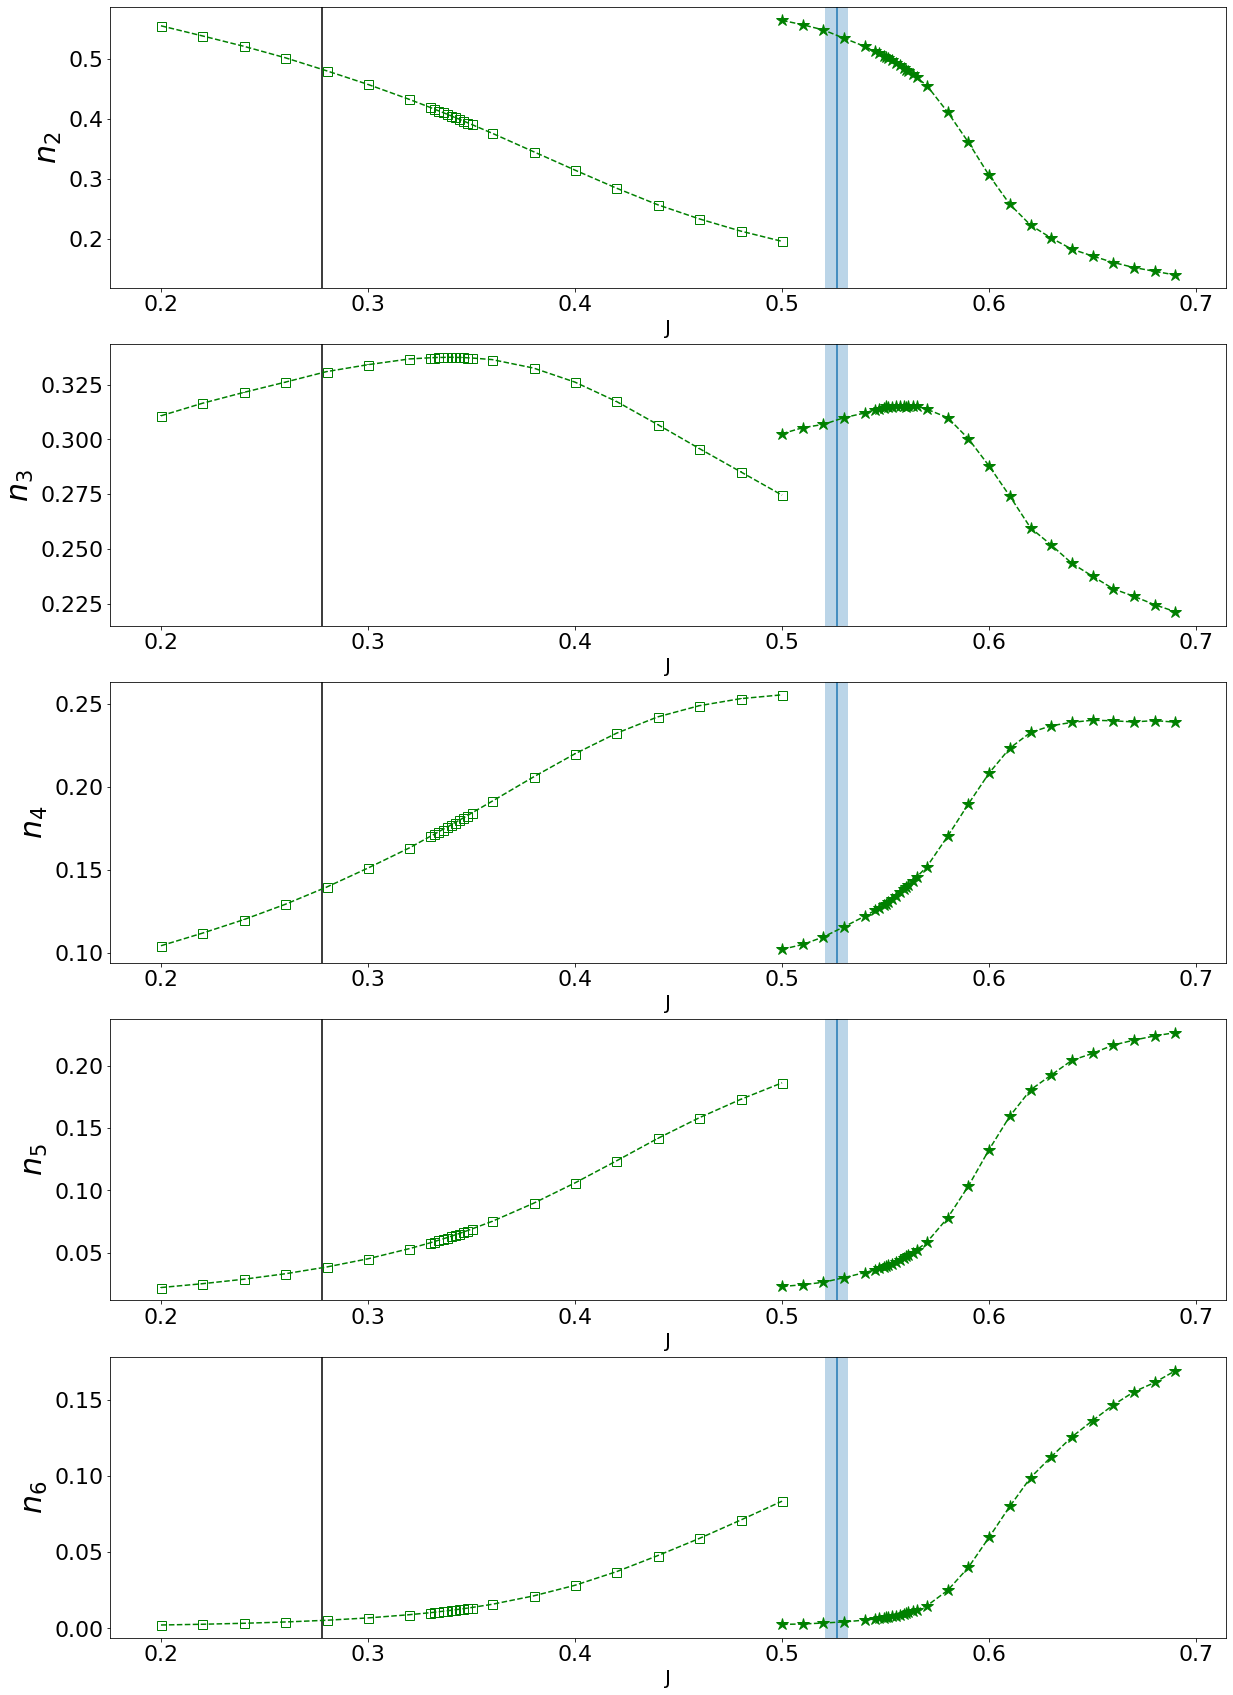

In [18]:
DIR = Path.cwd().parent / "Simulation Results"
dirs = ["Geo_ISAW_3D_Add.txt", "Geo_Is_3D_Add.txt"]
data_Is_3D = np.loadtxt(DIR / dirs[1])
data_ISAW_3D = np.loadtxt(DIR / dirs[0])

fig, ax = plt.subplots(5, 1, figsize=(20,30))

Ns = np.unique(data_Is_3D[:,0])
k = 0
col = ['green', 'blue', 'red', 'purple']

crit_ISAW3D = 0.2779
crit_TrISAW = [0.337, 0.406, 0.470]
crit_Is3D = [1 / 1.88, 1 / 1.90, 1 / 1.92]

for N in Ns:
    data1 = data_Is_3D[data_Is_3D[:, 0] == N]
    y= np.argsort(data1[:, 1],kind='mergesort')
    data1 = data1[y]
    data2 = data_ISAW_3D[data_ISAW_3D[:, 0] == N]
    y= np.argsort(data2[:, 1],kind='mergesort')
    data2 = data2[y]
    for i in range(2,6+1):
        j = i * 2 - 1
        j_TrIs = j + 10
        ax[i - 2].errorbar(data1[:,1], data1[:,j], yerr=data1[:,j+1], c=col[k], ms=13, fmt='*--', label='IsingISAW, N = ' + str(int(N)))
        ax[i - 2].errorbar(data2[:,1], data2[:,j], yerr=data2[:,j+1], c=col[k], ms=9, fmt='s--', fillstyle='none', label='ISAW, N = ' + str(int(N)))
        ax[i - 2].set_ylabel('n' + str(int(i)), fontsize=15)
    k += 1
    
for i in range(2, 6+1):
    ax[i - 2].set_ylabel(r'$n_' + str(int(i)) + '$', fontsize=30)
    ax[i - 2].set_xlabel('J', fontsize=20)
    ax[i - 2].axvline(crit_ISAW3D, c ="k")
    ax[i - 2].axvspan(crit_Is3D[0], crit_Is3D[2], alpha=0.3)
    ax[i - 2].axvline(crit_Is3D[1])
    ax[i - 2].tick_params(labelsize=22)

#plt.savefig(Path.cwd() / "Images" / "Ising_vs_ISAW_200.png")

# Фитирование отклонений пиков от точки перехода

In [6]:
data_N3_2D_ISAW = np.array([[4900, 0.609, 0.002], [3600, 0.609, 0.002], [2500, 0.61, 0.005],[1000, 0.615, 0.002], [400, 0.620, 0.002], [250, 0.625, 0.002], [100, 0.66, 0.002]])
data_N3_2D_Ising = np.array([[4900, 0.8,0.002], [3600, 0.802, 0.002], [2500, 0.8, 0.005], [1000, 0.8, 0.002], [400, 0.807, 0.002], [250, 0.81, 0.002], [100, 0.844, 0.002]])

data_N3_3D_ISAW = np.array([[1200, 0.3, 0.002], [600, 0.31, 0.002], [300, 0.33, 0.002], [200,0.34,0.002], [100, 0.39, 0.002]])
data_N3_3D_Ising = np.array([[1200, 0.528, 0.002], [600, 0.537, 0.002], [300, 0.549, 0.002], [200,0.561,0.002],[100, 0.61, 0.002]])
data_N4_3D_ISAW = np.array([[1200, 0.4, 0.02], [600, 0.42, 0.02], [300, 0.48, 0.02]])
data_N4_3D_Ising = np.array([[1200, 0.54, 0.02], [600, 0.57, 0.01],[300, 0.63, 0.01]])
data_N5_3D_ISAW = np.array([[1200, 0.54, 0.02], [600, 0.58, 0.02]])
data_N5_3D_Ising = np.array([[1200, 0.6, 0.02], [600, 0.7, 0.1]])

data_N4_TrISAW = np.array([[1200, 0.34, 0.02], [600, 0.34, 0.02], [300, 0.34, 0.02], [100, 0.36, 0.02]])
data_N4_TrIsing = np.array([[1200, 0.5, 0.01], [600, 0.5, 0.01], [300, 0.5, 0.01], [100, 0.52, 0.01]])
data_N5_TrISAW = np.array([[1200, 0.52, 0.02], [600, 0.52, 0.01], [300, 0.53, 0.01], [100, 0.54, 0.01]])
data_N5_TrIsing = np.array([[1200, 0.58, 0.02], [600, 0.59, 0.01], [300, 0.6, 0.02], [100, 0.6, 0.02]])

data_3D_ISAW = [data_N3_3D_ISAW, data_N4_3D_ISAW, data_N5_3D_ISAW]
data_3D_Ising = [data_N3_3D_Ising, data_N4_3D_Ising, data_N5_3D_Ising]

crit_ISAW3D = 0.2779
crit_TrISAW = [0.337, 0.406, 0.470]
crit_Is3D = [1 / 1.88, 1 / 1.90, 1 / 1.92]
crit_ISAW2D=0.6673
crit_Is2D=0.8340

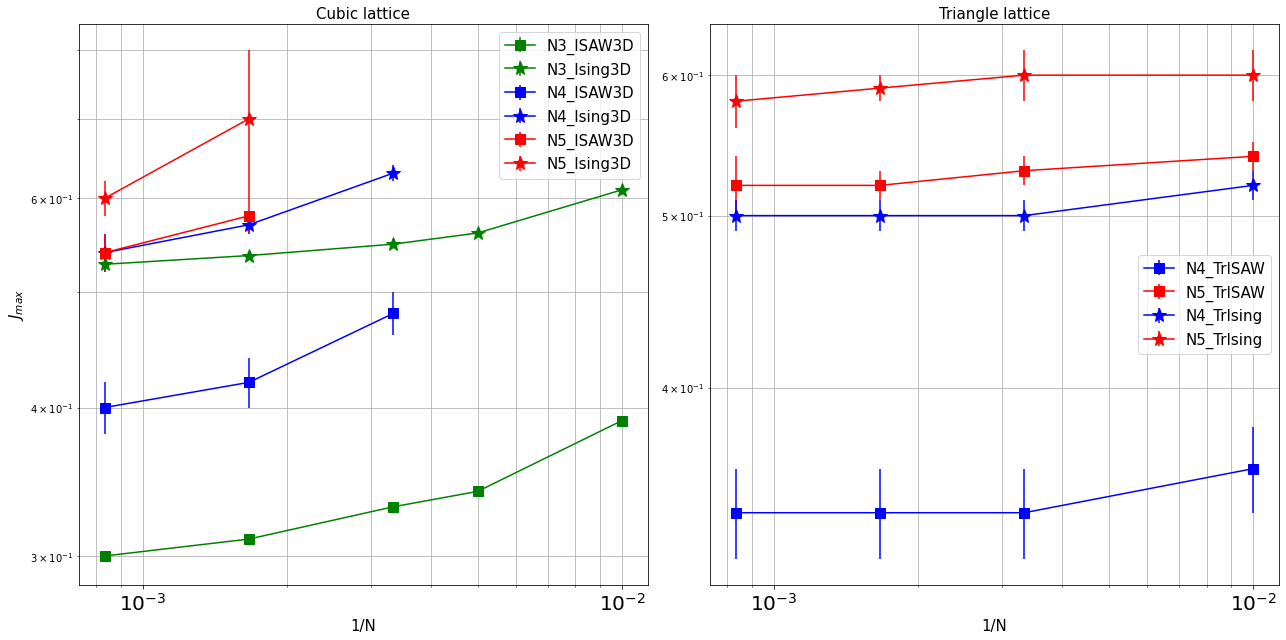

In [9]:
fig,ax = plt.subplots(1, 2, figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[0].errorbar(1/ISAW[:,0], ISAW[:,1], yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[0].errorbar(1/Is[:,0], Is[:,1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$J_{max}$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

ax[1].errorbar(1/data_N4_TrISAW[:,0], data_N4_TrISAW[:,1], yerr=data_N4_TrISAW[:,2], fmt='s-',ms=ms2, c=col[1], label='N4_TrISAW')
ax[1].errorbar(1/data_N5_TrISAW[:,0], data_N5_TrISAW[:,1], yerr=data_N5_TrISAW[:,2], fmt='s-',ms=ms2, c=col[2], label='N5_TrISAW')
ax[1].errorbar(1/data_N4_TrIsing[:,0], data_N4_TrIsing[:,1], yerr=data_N4_TrIsing[:,2], fmt='*-', ms=ms1,c=col[1], label='N4_TrIsing')
ax[1].errorbar(1/data_N5_TrIsing[:,0], data_N5_TrIsing[:,1], yerr=data_N5_TrIsing[:,2], fmt='*-', ms=ms1,c=col[2], label='N5_TrIsing')

ax[1].set_title('Triangle lattice',fontsize=15)
for i in [0,1]:
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].legend(fontsize=15)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].grid(True, 'both')
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks.png")

### Лог-лог масштаб

In [10]:
def log_log_f(x,a,b,c):
    return np.exp(b) * np.power(x,a) + c

In [11]:
def log_log_opt(ax, data, crit, fit_label, label, name, origin=False, fmt=None):
    x = 1/data[:,0]
    y = abs(data[:,1] - crit)
    res = linR(np.log(x), np.log(y))
    try:
        popt, pcov = c_f(log_log_f, x, y, p0=[res.slope, res.intercept, 0])
        perr = np.sqrt(np.diag(pcov))
        ax.plot(x, log_log_f(x, *popt), label=fit_label)
        print(name, f' = e ^ {round(popt[1], 4)} * x ^ {round(popt[0], 4)} + {round(popt[2], 4)},'
          f' error is (d_a = {round(perr[0], 4)}, d_b = {round(perr[1], 4)}, d_c = {round(perr[2], 4)})')
    except RuntimeError:
        print("Couldn't find constant in ", name)
        ax.plot(x, np.exp(res.intercept) * np.power(x, res.slope), label=fit_label)
        print(name, f' = e ^ {round(res.intercept, 4)} * x ^ {round(res.slope, 4)},'
          f' error is (d_a = {round(res.stderr, 4)}, d_b = {round(res.intercept_stderr, 4)})')
    if origin:
        ax.errorbar(x, y, yerr=data[:,2], fmt=fmt, ms=ms1, c=col[0], label=label)

In [4]:
def log_log_opt_linR(ax, data, crit, fit_label, label, name, origin=False, fmt=None):
    x = 1/data[:,0]
    y = abs(data[:,1] - crit)
    res = linR(np.log(x), np.log(y))
    res2 = linR(np.exp(res.intercept) * np.power(x, res.slope), y)
    ax.plot(x, res2.slope * np.exp(res.intercept) * np.power(x, res.slope) + res2.intercept, label=fit_label)
    print(name, f' = {round(res2.slope,4)} * e ^ {round(res.intercept, 4)} * x ^ {round(res.slope, 4)} + {round(res2.intercept,4)},'
          f' error is (d_a = {round(res.stderr, 4)}, d_b = {round(res.intercept_stderr, 4)})')
    if origin:
        ax.errorbar(x, y, yerr=data[:,2], fmt=fmt, ms=ms1, c=col[0], label=label)

log(y) = a log(x) + b => y = e^b * x^a
Couldn't find constant in  n3_peak_Ising_2D(1/N)
n3_peak_Ising_2D(1/N)  = e ^ -4.2369 * x ^ -0.1047, error is (d_a = 0.0313, d_b = 0.2263)
Couldn't find constant in  n3_peak_ISAW_2D(1/N)
n3_peak_ISAW_2D(1/N)  = e ^ -3.7082 * x ^ -0.1058, error is (d_a = 0.012, d_b = 0.0871)
n3_peak_Ising_3D(1/N)  = e ^ 2.9449 * x ^ 1.1751 + -0.0015, error is (d_a = 0.1124, d_b = 0.4968, d_c = 0.0029)
n3_peak_ISAW_3D(1/N)  = e ^ 1.8903 * x ^ 0.9128 + 0.0126, error is (d_a = 0.1436, d_b = 0.615, d_c = 0.0065)


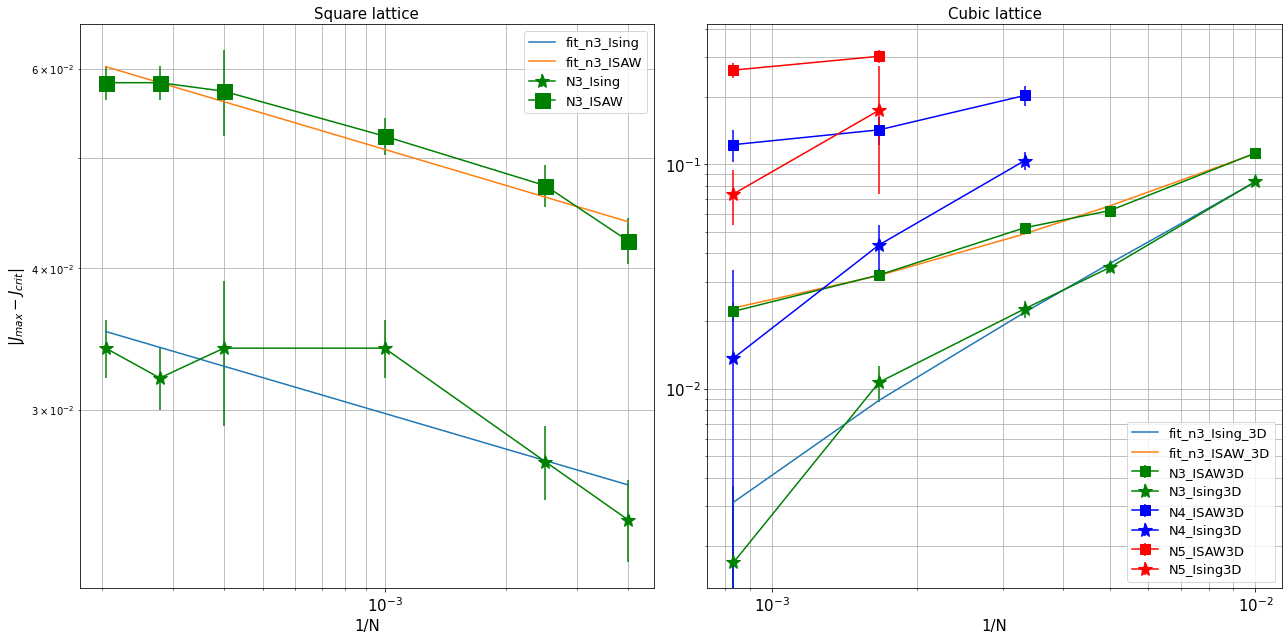

In [12]:
fig,ax = plt.subplots(1, 2,figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

print("log(y) = a log(x) + b => y = e^b * x^a")

log_log_opt(ax[0], data_N3_2D_Ising[:-1], crit_Is2D, 'fit_n3_Ising','N3_Ising' ,'n3_peak_Ising_2D(1/N)', True, '*-')
log_log_opt(ax[0], data_N3_2D_ISAW[:-1], crit_ISAW2D, 'fit_n3_ISAW','N3_ISAW' ,'n3_peak_ISAW_2D(1/N)', True, 's-')


for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[1].errorbar(1/ISAW[:,0], ISAW[:,1] - crit_ISAW3D, yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[1].errorbar(1/Is[:,0], Is[:,1] - crit_Is3D[1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$J_{max}$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

log_log_opt(ax[1], data_3D_Ising[0], crit_Is3D[1], 'fit_n3_Ising_3D','N3_Ising3D' ,'n3_peak_Ising_3D(1/N)')
log_log_opt(ax[1], data_3D_ISAW[0], crit_ISAW3D, 'fit_n3_ISAW_3D','N3_ISAW3D' ,'n3_peak_ISAW_3D(1/N)')

for i, name in zip([0,1] , ['Square lattice' , 'Cubic lattice']):
    ax[i].set_title(name, fontsize=15)
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].set_xscale('log')
    ax[i].grid(True, 'both')
    ax[i].tick_params(labelsize=15)
    ax[i].legend(fontsize=13)
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$|J_{max} - J_{crit}|$', fontsize=15)
#ax[0].set_yscale('symlog')

plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks_2D-3D(log-log).png")

### Y-log X-линейный масштаб

In [13]:
def log_lin_f(x,a,b,c):
    return np.exp(a * x + b) + c

In [14]:
def log_lin_opt(ax, data, crit, fit_label, label, name, origin=False):
    x = 1/data[:,0]
    y = abs(data[:,1] - crit)
    res = linR(x, np.log(y))
    try:
        popt, pcov = c_f(log_lin_f, x, y, p0=[res.slope, res.intercept, 0])
        perr = np.sqrt(np.diag(pcov))
        ax.plot(x, log_lin_f(x, *popt), label=fit_label)
        print(name, f' = e ^ ({round(popt[0], 4)} * x + {round(popt[1], 4)}) + {round(popt[2], 4)},'
          f' error is (d_a = {round(perr[0], 4)}, d_b = {round(perr[1], 4)}, d_c = {round(perr[2], 4)})')
    except RuntimeError:
        print("Couldn't find constant in ", name)
        ax.plot(x, np.exp(res.intercept + x * res.slope), label=fit_label)
        print(name, f' = e ^ ({round(res.intercept, 4)} + x * {round(res.slope, 4)}),'
          f' error is (d_a = {round(res.stderr, 4)}, d_b = {round(res.intercept_stderr, 4)})')
    if origin:
        ax.errorbar(x, y, yerr=data[:,2], fmt='*-', ms=ms1, c=col[0], label=label)

log(y) = a x + b => y = e^(b + a * x) + c
Couldn't find constant in  n3_peak_Ising_2D(1/N)
n3_peak_Ising_2D(1/N)  = e ^ (-3.3588 + x * -92.4801), error is (d_a = 13.7174, d_b = 0.0272)
n3_peak_ISAW_2D(1/N)  = e ^ (-353.6008 * x + -3.7684) + 0.037, error is (d_a = 126.5742, d_b = 0.1636, d_c = 0.0042)
n3_peak_Ising_3D(1/N)  = e ^ (43.4426 * x + -1.8408) + -0.1615, error is (d_a = 21.4995, d_b = 0.6223, d_c = 0.1004)
Couldn't find constant in  n3_peak_ISAW_3D(1/N)
n3_peak_ISAW_3D(1/N)  = e ^ (-3.7203 + x * 164.5649), error is (d_a = 28.2793, d_b = 0.1494)


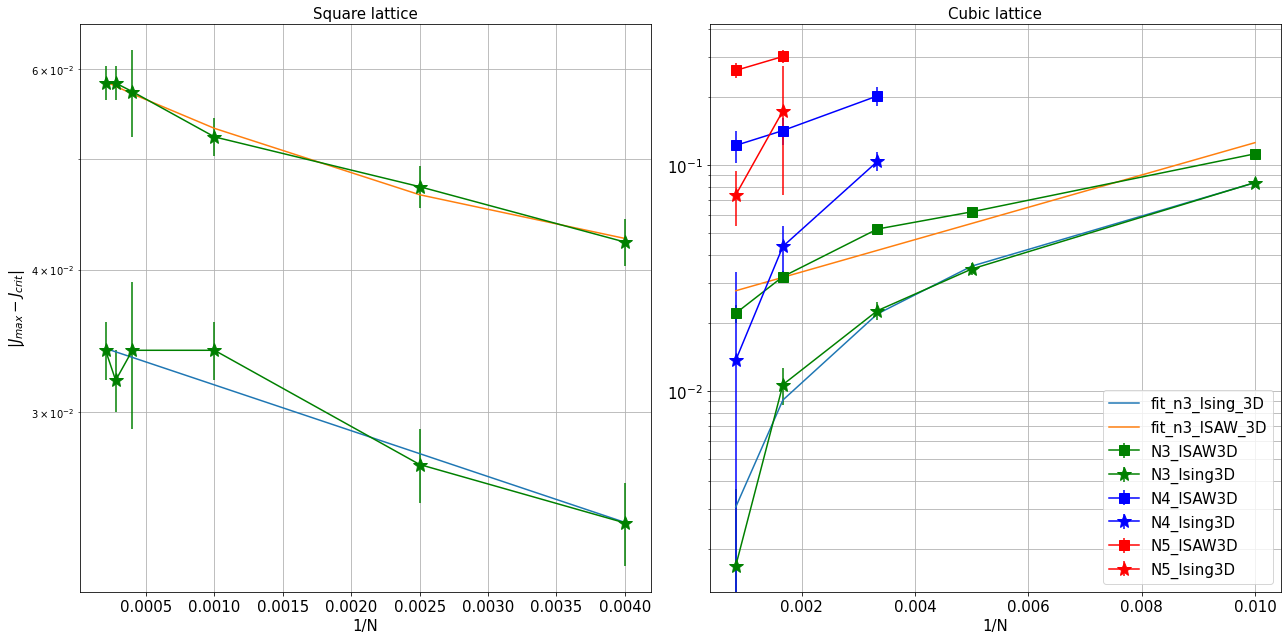

In [15]:
fig,ax = plt.subplots(1, 2,figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

print("log(y) = a x + b => y = e^(b + a * x) + c")
log_lin_opt(ax[0], data_N3_2D_Ising[:-1], crit_Is2D, 'fit_n3_Ising','N3_Ising' ,'n3_peak_Ising_2D(1/N)',True)
log_lin_opt(ax[0], data_N3_2D_ISAW[:-1], crit_ISAW2D, 'fit_n3_ISAW','N3_ISAW' ,'n3_peak_ISAW_2D(1/N)', True)


for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[1].errorbar(1/ISAW[:,0], ISAW[:,1] - crit_ISAW3D, yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[1].errorbar(1/Is[:,0], Is[:,1] - crit_Is3D[1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$|J_{max} - J_{crit}|$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

log_lin_opt(ax[1], data_3D_Ising[0], crit_Is3D[1], 'fit_n3_Ising_3D','N3_Ising3D' ,'n3_peak_Ising_3D(1/N)')
log_lin_opt(ax[1], data_3D_ISAW[0], crit_ISAW3D, 'fit_n3_ISAW_3D','N3_ISAW3D' ,'n3_peak_ISAW_3D(1/N)')

for i, name in zip([0,1] , ['Square lattice' , 'Cubic lattice']):
    ax[i].set_title(name, fontsize=15)
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].grid(True, 'both')
    ax[i].tick_params(labelsize=15)

ax[1].legend(fontsize=15)
#ax[0].set_yscale('symlog')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks_2D-3D(log-linear).png")

### Линейный масштаб

y = a x + b
n3_peak_Ising_2D(1/N) = 4.4197 * x + -0.0366, error is (d_a = 0.3715, d_b = 0.0016)
n3_peak_ISAW_2D(1/N) = 5.1116 * x + -0.0596, error is (d_a = 0.2092, d_b = 0.0009)

n3_peak_Ising_3D(1/N) = 8.8263 * x + -0.0061, error is (d_a = 0.341, d_b = 0.0018)
n3_peak_ISAW_3D(1/N) = 9.6316 * x + 0.016, error is (d_a = 0.3889, d_b = 0.0021)


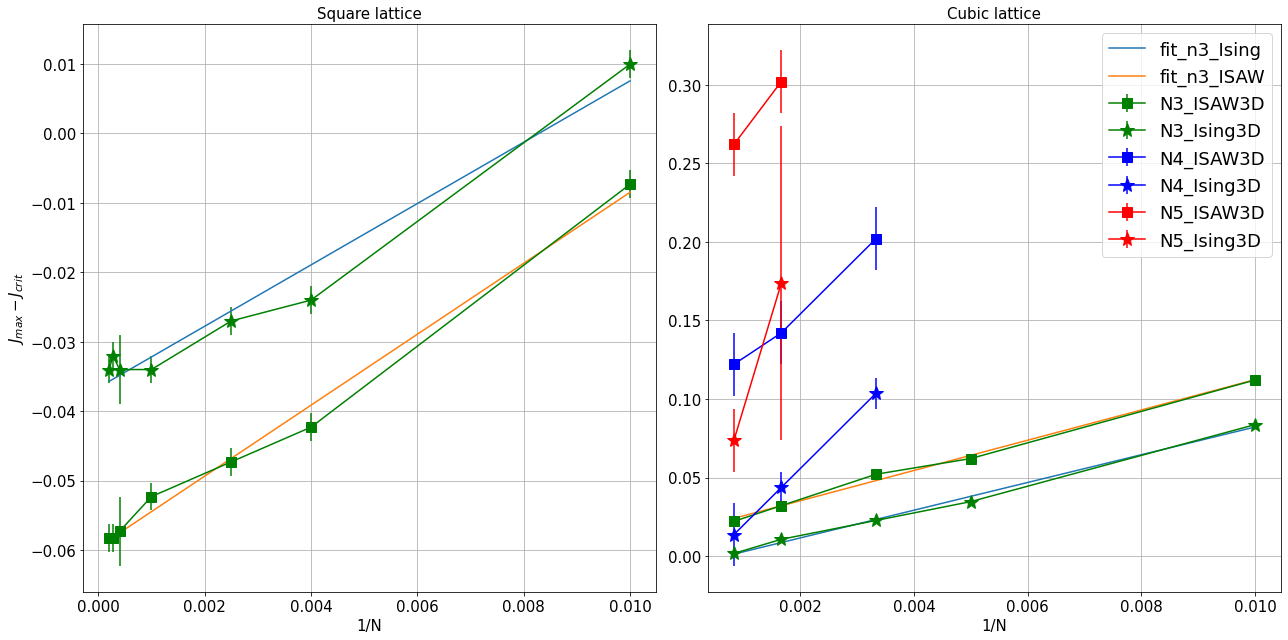

In [16]:
fig,ax = plt.subplots(1, 2,figsize=(18,9))
col = ['green', 'blue', 'red']
ms1=15
ms2=10

print("y = a x + b")

ax[0].errorbar(1/data_N3_2D_Ising[:,0], data_N3_2D_Ising[:,1] - crit_Is2D, yerr=data_N3_2D_Ising[:,2], fmt='*-', ms=ms1, c=col[0], label='N3_Ising2D')
ax[0].errorbar(1/data_N3_2D_ISAW[:,0], data_N3_2D_ISAW[:,1] - crit_ISAW2D, yerr=data_N3_2D_ISAW[:,2], fmt='s-',ms=ms2, c=col[0], label='N3_ISAW2D')

x = 1/data_N3_2D_Ising[:,0]
y = data_N3_2D_Ising[:,1] - crit_Is2D
res = linR(x, y)
ax[0].plot(x, x * res.slope + res.intercept, label='fit_n3_Ising')
print(f'n3_peak_Ising_2D(1/N) = {round(res.slope,4)} * x + {round(res.intercept,4)}, error is (d_a = {round(res.stderr,4)}, d_b = {round(res.intercept_stderr,4)})')

x = 1/data_N3_2D_ISAW[:,0]
y = data_N3_2D_ISAW[:,1] - crit_ISAW2D
res = linR(x, y)
ax[0].plot(x, x * res.slope + res.intercept, label='fit_n3_ISAW')
print(f'n3_peak_ISAW_2D(1/N) = {round(res.slope,4)} * x + {round(res.intercept,4)}, error is (d_a = {round(res.stderr,4)}, d_b = {round(res.intercept_stderr,4)})',end='\n\n')

for Is, ISAW, c, n in zip(data_3D_Ising, data_3D_ISAW, col, [3,4,5]):
    ax[1].errorbar(1/ISAW[:,0], ISAW[:,1] - crit_ISAW3D, yerr=ISAW[:,2], fmt='s-',ms=ms2, c=c, label=f'N{n}_ISAW3D')
    ax[1].errorbar(1/Is[:,0], Is[:,1] - crit_Is3D[1], yerr=Is[:,2], fmt='*-', ms=ms1, c=c, label=f'N{n}_Ising3D')
ax[0].set_ylabel(r'$J_{max}-J_{crit}$', fontsize=15)
ax[0].set_title('Cubic lattice', fontsize=15)

x = 1/data_3D_Ising[0][:,0]
y = data_3D_Ising[0][:,1] - crit_Is3D[1]
res = linR(x, y)
ax[1].plot(x, x * res.slope + res.intercept, label='fit_n3_Ising')
print(f'n3_peak_Ising_3D(1/N) = {round(res.slope,4)} * x + {round(res.intercept,4)}, error is (d_a = {round(res.stderr,4)}, d_b = {round(res.intercept_stderr,4)})')

x = 1/data_3D_ISAW[0][:,0]
y = data_3D_ISAW[0][:,1] - crit_ISAW3D
res = linR(x, y)
ax[1].plot(x, x * res.slope + res.intercept, label='fit_n3_ISAW')
print(f'n3_peak_ISAW_3D(1/N) = {round(res.slope,4)} * x + {round(res.intercept,4)}, error is (d_a = {round(res.stderr,4)}, d_b = {round(res.intercept_stderr,4)})')

for i, name in zip([0,1] , ['Square lattice' , 'Cubic lattice']):
    ax[i].set_title(name, fontsize=15)
    ax[i].set_xlabel('1/N', fontsize=15)
    ax[i].grid(True, 'both')
    ax[i].tick_params(labelsize=15)
    
ax[1].legend(fontsize=18)
plt.tight_layout()
#plt.savefig(Path.cwd() / "Images" / "IsingISAW_Peaks_2D-3D(linear-linear).png")

# Подсчёт соседей у треугольной решётки

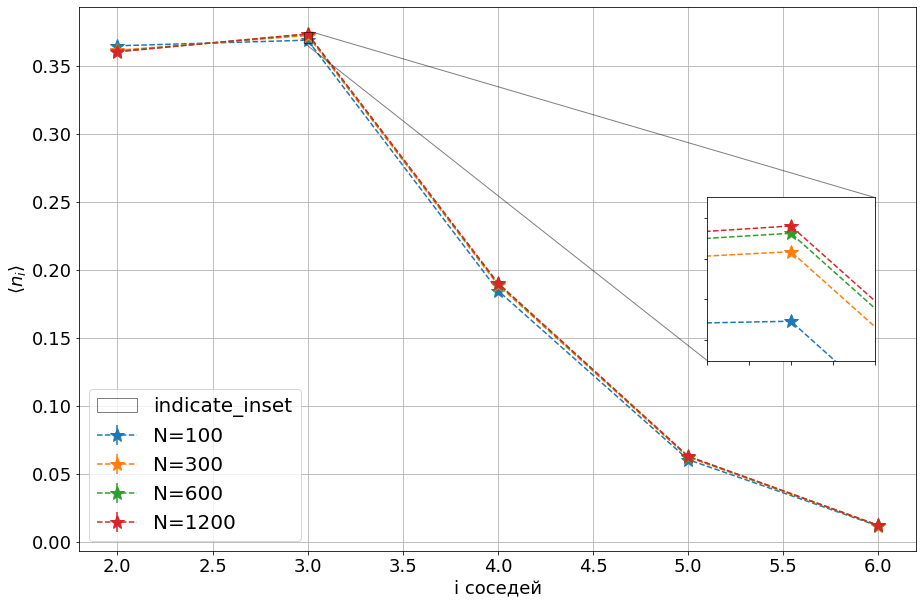

In [2]:
#%matplotlib
DIR = Path.cwd().parent / "Simulation Results"
data = np.loadtxt(DIR / "Geo_TrIs_All.txt")
data = data[data[:,1] == 0]

fig, ax = plt.subplots(figsize=(15,10))
n = [2,3,4,5,6]
for d in data:
    ax.errorbar(n, d[3:13:2], yerr=d[4:14:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
ax.grid(True)
ax.set_xlabel("i соседей", fontsize=18)
ax.set_ylabel(r"$\langle n_{i} \rangle$", fontsize=18)
ax.tick_params(labelsize=18)

axins=ax.inset_axes([0.75, 0.35, 0.2, 0.3])
for d in data:
    axins.errorbar(n, d[3:13:2], yerr=d[4:14:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
x1, x2, y1, y2 = 2.98, 3.02, 0.367, 0.375
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.legend(fontsize=20)

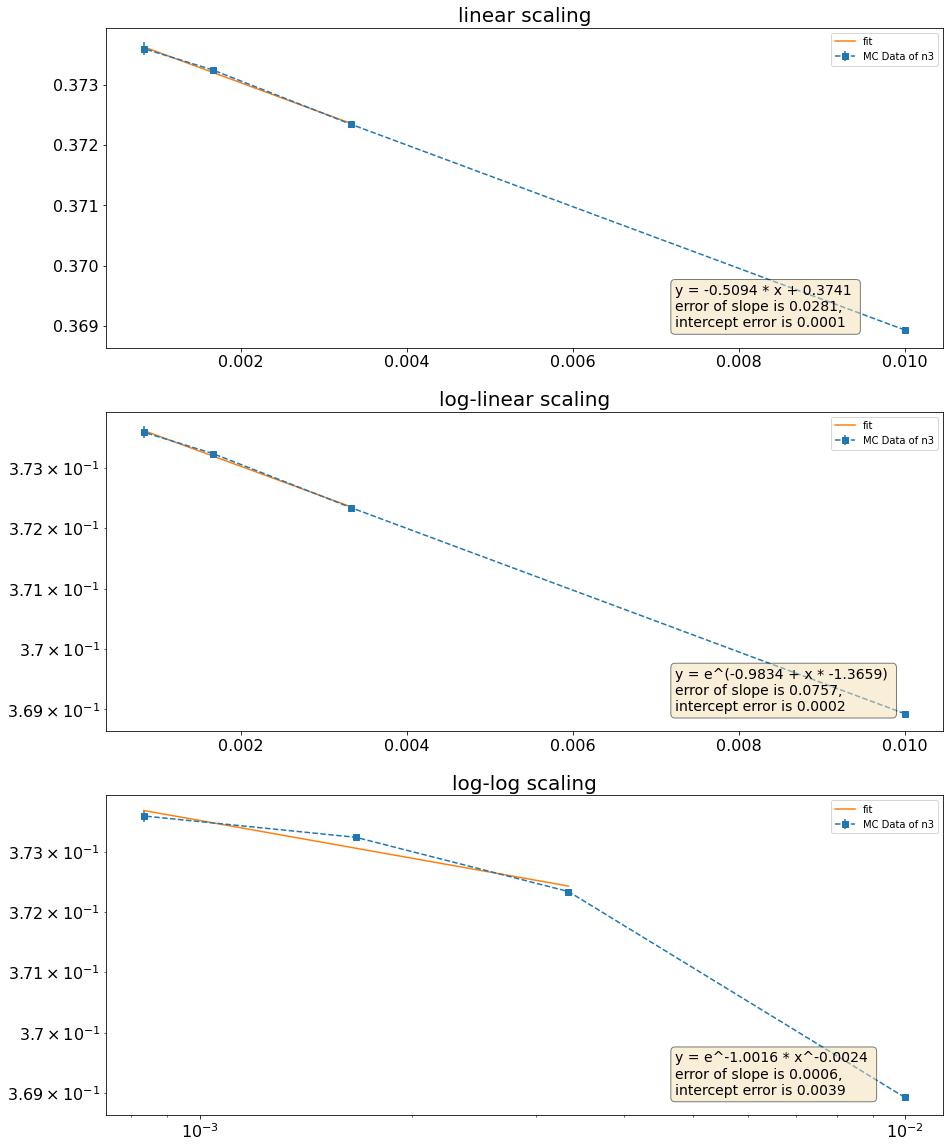

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(15,20))
x = 1/data[:,0]
y = data[:,5]
dy = data[:,6]
for i, scaling, ax in zip([0,1,2], [('linear', 'linear'), ('log', 'linear'), ('log', 'log')], axes):
    ax.errorbar(x, y, yerr=dy, fmt="s--", label="MC Data of n3")
    ax.set_xscale(scaling[1])
    ax.set_yscale(scaling[0])
    x_reg = x[1:]
    y_reg = y[1:]
    if scaling[0] == 'linear' and scaling[1] == 'linear':
        title = 'linear scaling'
        res = linR(x_reg,y_reg)
        y_sc = res.slope * x_reg + res.intercept
        textf = f"{round(res.slope, 4)} * x + {round(res.intercept, 4)} \n"
    elif scaling[0] == 'log' and scaling[1] == 'linear':
        title = 'log-linear scaling'
        res = linR(x_reg, np.log(y_reg))
        y_sc = np.exp(res.slope * x_reg + res.intercept)
        textf = f"e^({round(res.intercept, 4)} + x * {round(res.slope, 4)}) \n"
    else:
        title = 'log-log scaling'
        res = linR(np.log(x_reg), np.log(y_reg))
        y_sc = np.exp(res.intercept) * x_reg ** res.slope
        textf = f"e^{round(res.intercept, 4)} * x^{round(res.slope, 4)} \n"
    textstr = "y = " + textf + f"error of slope is {round(res.stderr, 4)},\n" + f"intercept error is {round(res.intercept_stderr, 4)}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.68, 0.2, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelsize=16, which='both')
    ax.plot(x_reg, y_sc, label='fit')
    ax.legend()

# Подсчёт соседей у куба

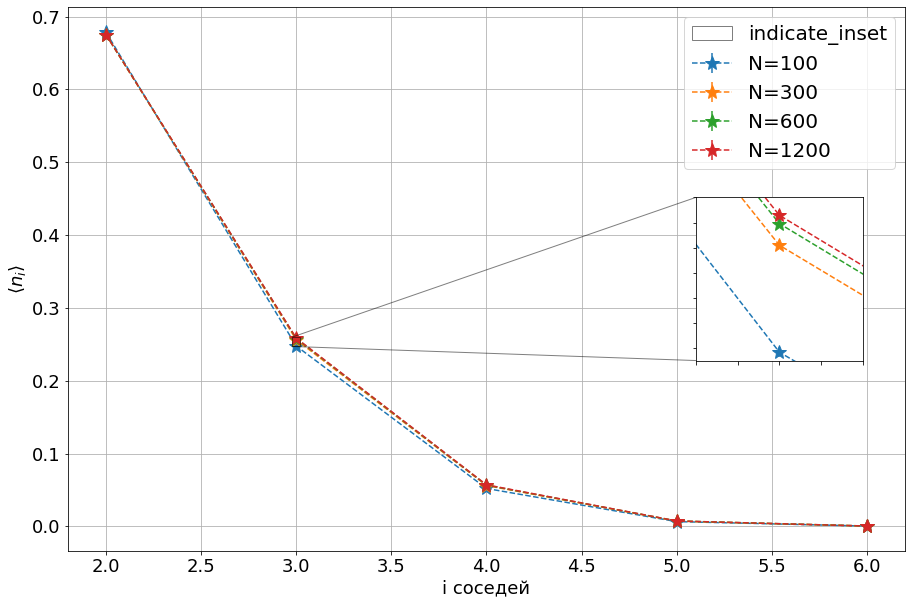

In [4]:
#%matplotlib
DIR = Path.cwd().parent / "Simulation Results"
data = np.loadtxt(DIR / "Geo_Is_3D_All.txt")
data = data[data[:,1] == 0]

fig, ax = plt.subplots(figsize=(15,10))
n = [2,3,4,5,6]
for d in data:
    ax.errorbar(n, d[3:13:2], yerr=d[4:14:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
ax.grid(True)
ax.set_xlabel("i соседей", fontsize=18)
ax.set_ylabel(r"$\langle n_{i} \rangle$", fontsize=18)
ax.tick_params(labelsize=18)

axins=ax.inset_axes([0.75, 0.35, 0.2, 0.3])
for d in data:
    axins.errorbar(n, d[3:13:2], yerr=d[4:14:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
x1, x2, y1, y2 = 2.98, 3.02, 0.247, 0.26
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.legend(fontsize=20)

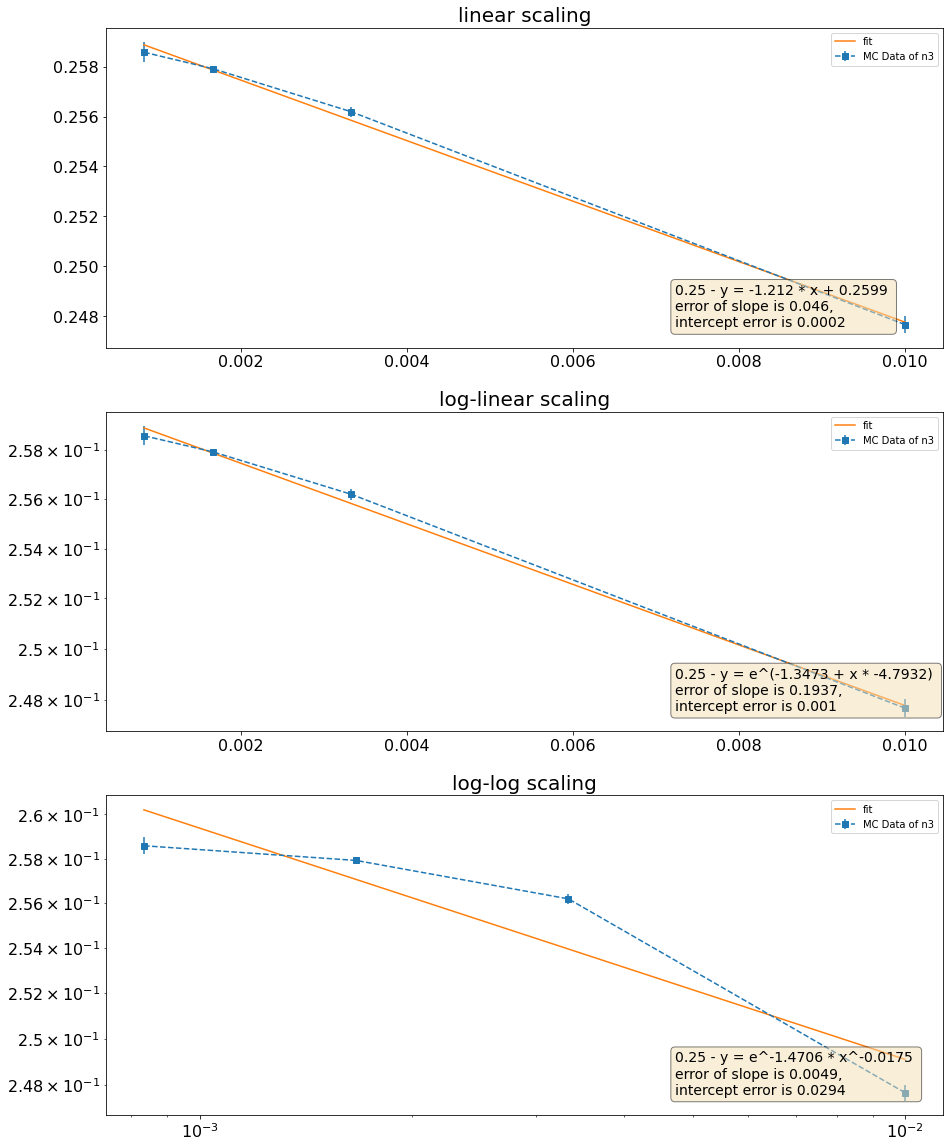

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(15,20))
x = 1/data[:,0]
y = data[:,5]
dy = data[:,6]
for i, scaling, ax in zip([0,1,2], [('linear', 'linear'), ('log', 'linear'), ('log', 'log')], axes):
    ax.errorbar(x, y, yerr=dy, fmt="s--", label="MC Data of n3")
    ax.set_xscale(scaling[1])
    ax.set_yscale(scaling[0])
    x_reg = x
    y_reg = y
    if scaling[0] == 'linear' and scaling[1] == 'linear':
        title = 'linear scaling'
        res = linR(x_reg,y_reg)
        y_sc = res.slope * x_reg + res.intercept
        textf = f"{round(res.slope, 4)} * x + {round(res.intercept, 4)} \n"
    elif scaling[0] == 'log' and scaling[1] == 'linear':
        title = 'log-linear scaling'
        res = linR(x_reg, np.log(y_reg))
        y_sc = np.exp(res.slope * x_reg + res.intercept)
        textf = f"e^({round(res.intercept, 4)} + x * {round(res.slope, 4)}) \n"
    else:
        title = 'log-log scaling'
        res = linR(np.log(x), np.log(y_reg))
        y_sc = np.exp(res.intercept) * x_reg ** res.slope
        textf = f"e^{round(res.intercept, 4)} * x^{round(res.slope, 4)} \n"
    textstr = "0.25 - y = " + textf + f"error of slope is {round(res.stderr, 4)},\n" + f"intercept error is {round(res.intercept_stderr, 4)}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.68, 0.2, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelsize=16, which='both')
    ax.plot(x_reg, y_sc, label='fit')
    ax.legend()

# Подсчёт соседей у гиперкуба

### Общий подсчёт в J = 0

(Увеличено в масштабе для n=3)

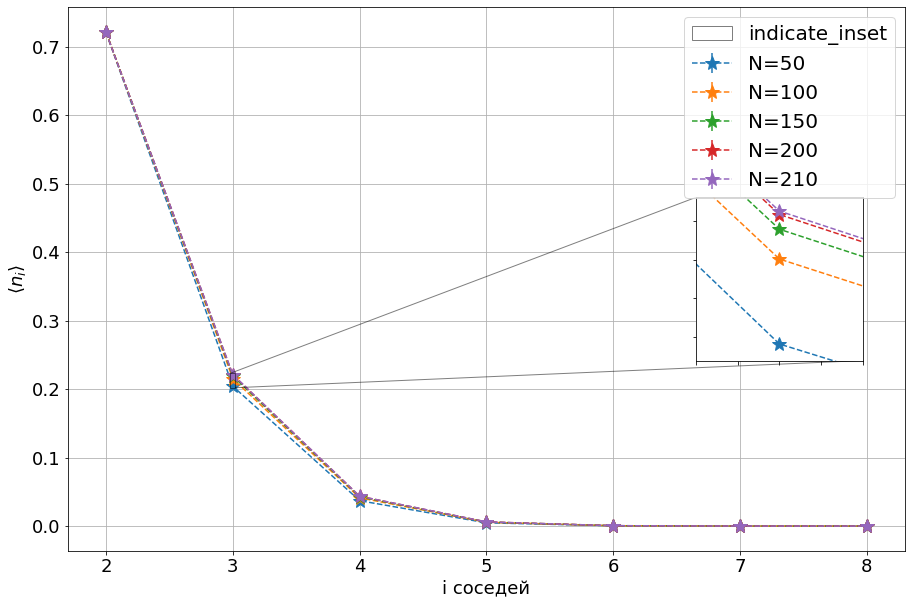

In [6]:
#%matplotlib
DIR = Path.cwd().parent / "Simulation Results"
data = np.loadtxt(DIR / "Geo_Is_4D_All.txt")
fig, ax = plt.subplots(figsize=(15,10))
n = [2,3,4,5,6,7,8]
for d in data:
    ax.errorbar(n, d[3:17:2], yerr=d[4:18:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
ax.grid(True)
ax.set_xlabel("i соседей", fontsize=18)
ax.set_ylabel(r"$\langle n_{i} \rangle$", fontsize=18)
ax.tick_params(labelsize=18)

axins=ax.inset_axes([0.75, 0.35, 0.2, 0.3])
for d in data:
    axins.errorbar(n, d[3:17:2], yerr=d[4:18:2], fmt='*--', ms=15, label='N=' + str(int(d[0])))
x1, x2, y1, y2 = 2.98, 3.02, 0.202, 0.223
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.legend(fontsize=20)

### Шкалирование N3 (гипотеза к 0.25)

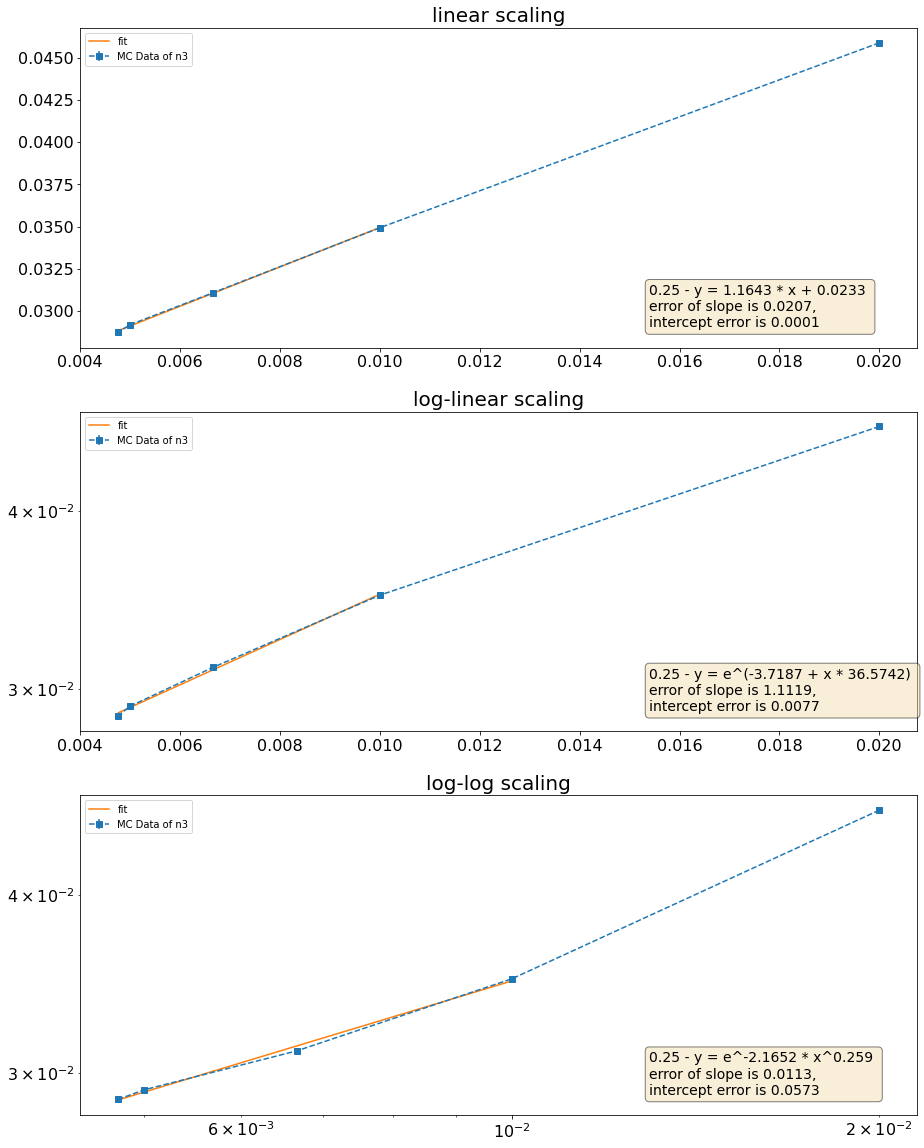

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(15,20))
x = 1/data[:,0]
y = 0.25 - data[:,5]
dy = data[:,6]
for i, scaling, ax in zip([0,1,2], [('linear', 'linear'), ('log', 'linear'), ('log', 'log')], axes):
    ax.errorbar(x, y, yerr=dy, fmt="s--", label="MC Data of n3")
    ax.set_xscale(scaling[1])
    ax.set_yscale(scaling[0])
    x_reg = x[1:]
    y_reg = y[1:]
    if scaling[0] == 'linear' and scaling[1] == 'linear':
        title = 'linear scaling'
        res = linR(x_reg,y_reg)
        y_sc = res.slope * x_reg + res.intercept
        textf = f"{round(res.slope, 4)} * x + {round(res.intercept, 4)} \n"
    elif scaling[0] == 'log' and scaling[1] == 'linear':
        title = 'log-linear scaling'
        res = linR(x_reg, np.log(y_reg))
        y_sc = np.exp(res.slope * x_reg + res.intercept)
        textf = f"e^({round(res.intercept, 4)} + x * {round(res.slope, 4)}) \n"
    else:
        title = 'log-log scaling'
        res = linR(np.log(x_reg), np.log(y_reg))
        y_sc = np.exp(res.intercept) * x_reg ** res.slope
        textf = f"e^{round(res.intercept, 4)} * x^{round(res.slope, 4)} \n"
    textstr = "0.25 - y = " + textf + f"error of slope is {round(res.stderr, 4)},\n" + f"intercept error is {round(res.intercept_stderr, 4)}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.68, 0.2, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelsize=16, which='both')
    ax.plot(x_reg, y_sc, label='fit')
    ax.legend()